In [ ]:
WORKING_DIR = "/home/xavier/Documents/DAE_project"

## Together

Reading log files...
  - Finished processing: events.out.tfevents.1715709358.bc13u30n1.64581.0
  - Finished processing: events.out.tfevents.1715986489.bc13u30n1.37218.0
Finished loading data.

Plot saved successfully to: D:\imgs_for_publication\figure2\training_loss_curve.pdf


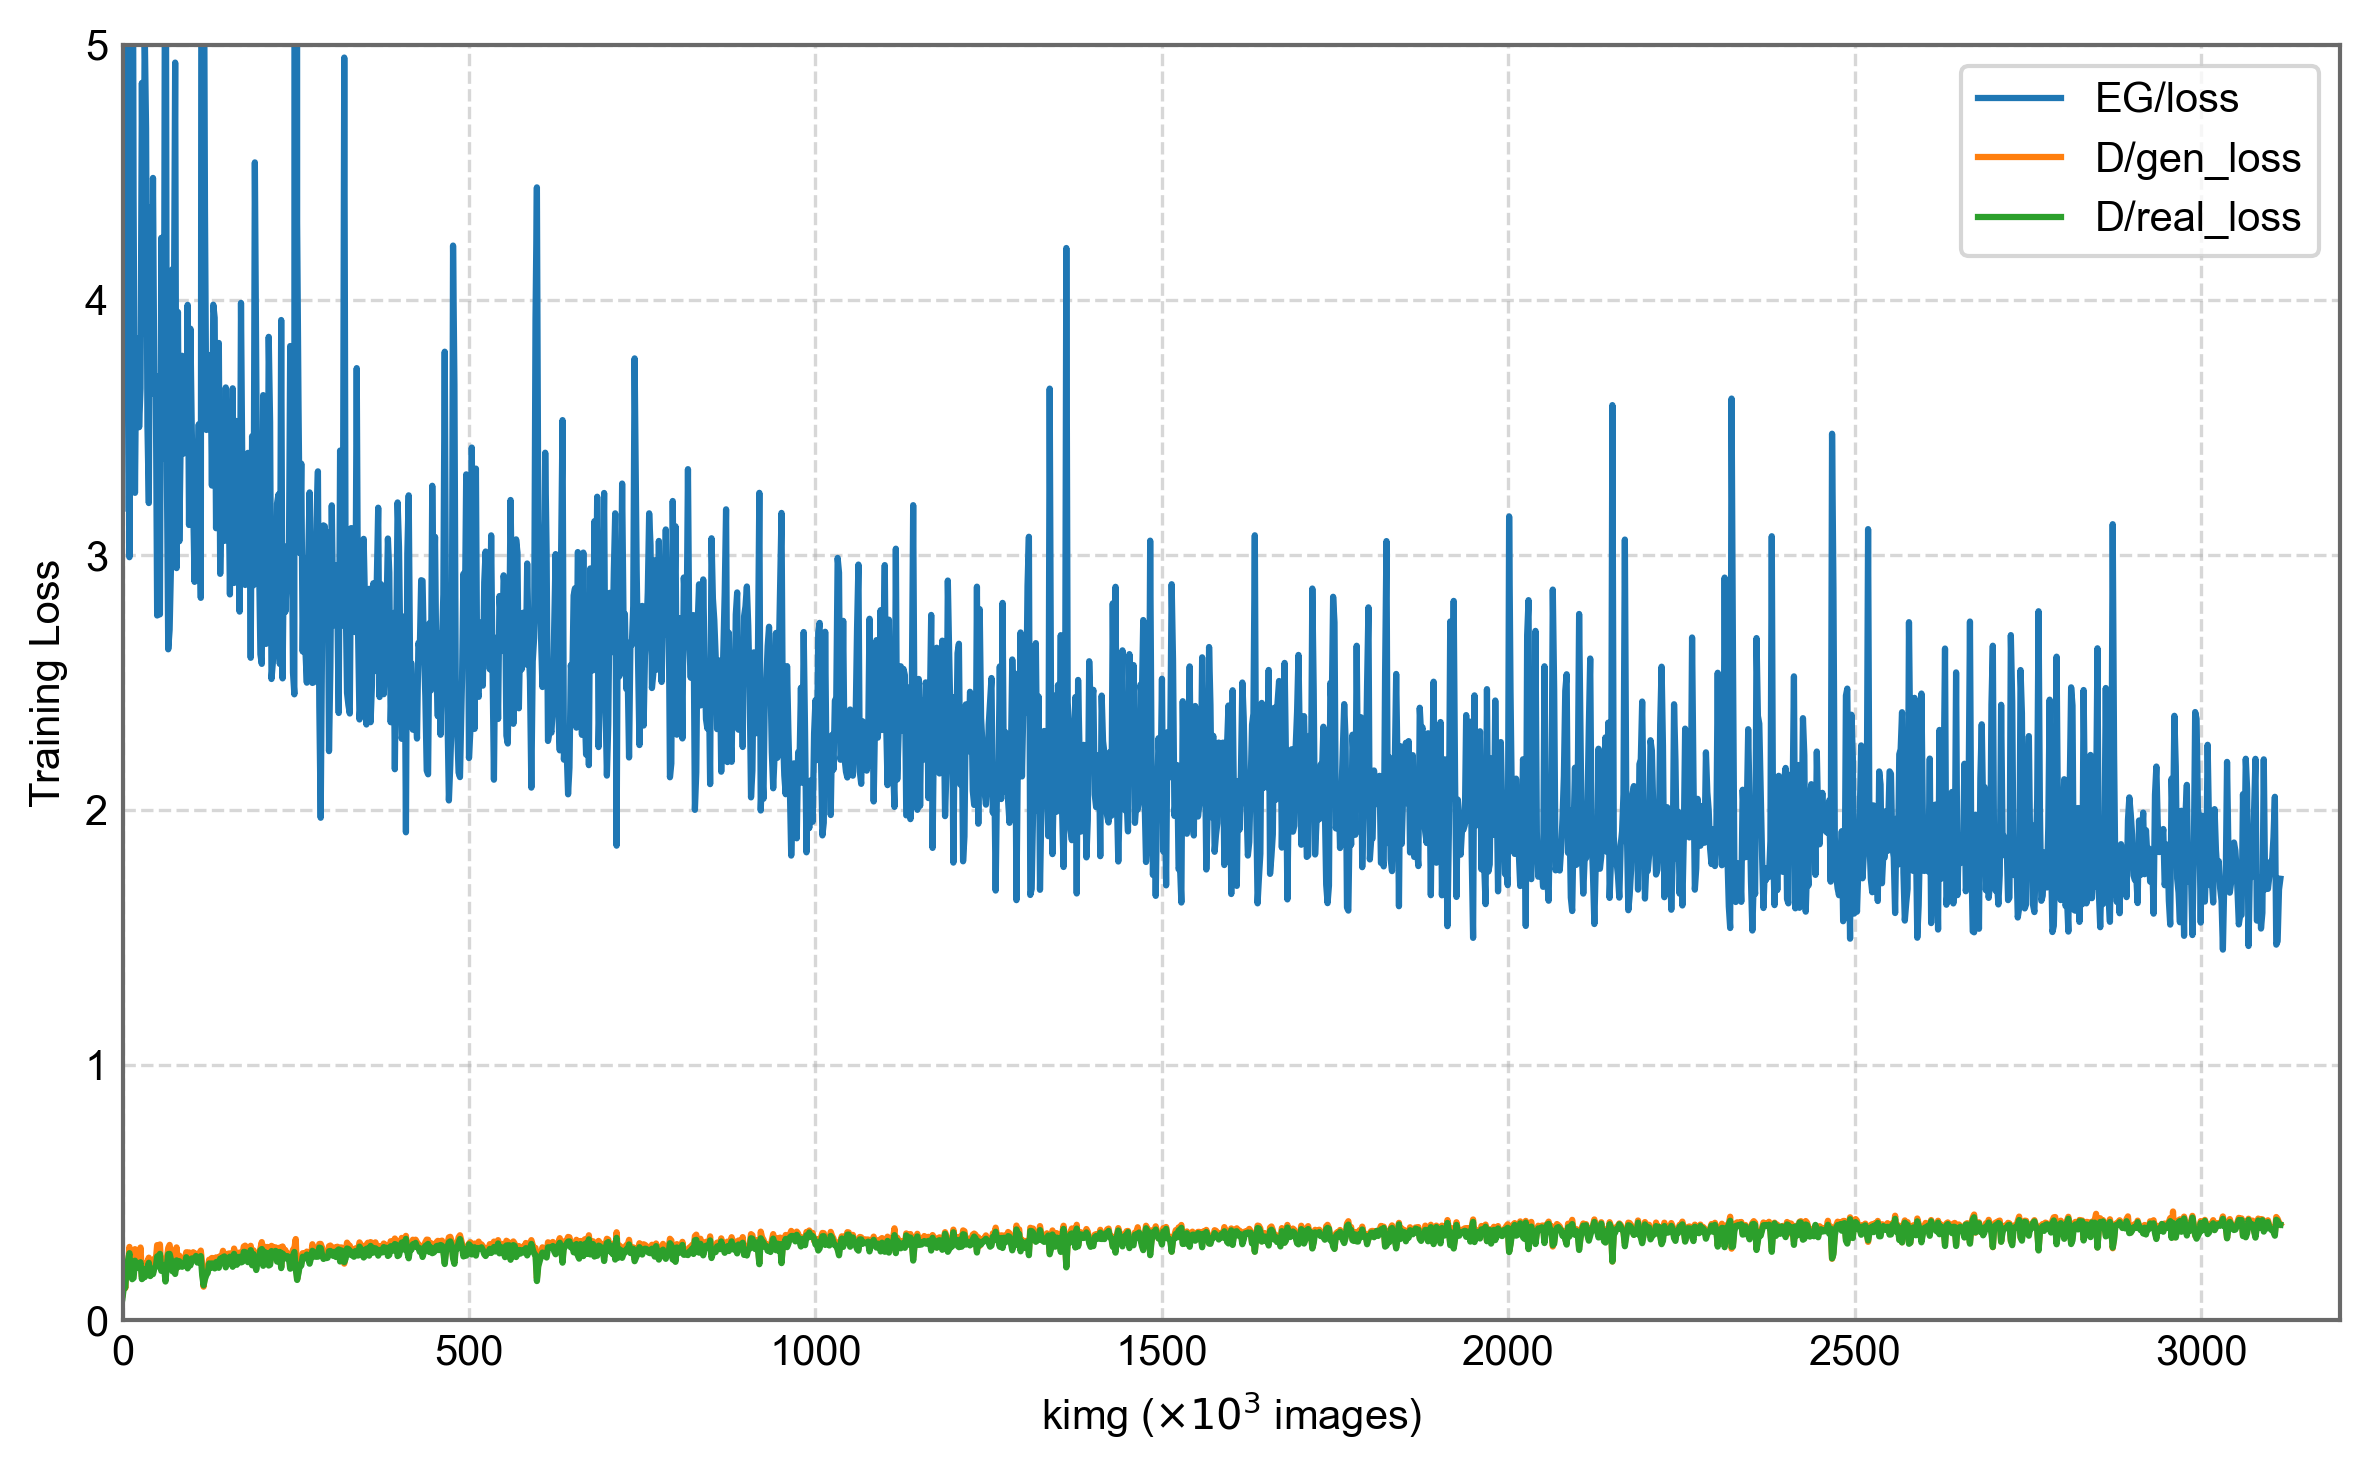

In [4]:
import matplotlib.pyplot as plt
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np  # Added numpy import for potential future use


def style_ax(ax):
    """
    Unified styling for the plot axes.
    - Sets a transparent background.
    - Sets spine (border) color to gray.
    - Adds a dashed grid behind plot elements.
    - Removes tick marks.
    """
    # Gray frame for the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('dimgray')
    # Grid lines appear behind the plot lines
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    # Remove tick marks for a cleaner look
    ax.tick_params(axis='both', which='both', length=0)


def load_tensorboard_data(logfiles, tags):
    """
    Loads scalar data from one or more TensorBoard event files.

    Args:
        logfiles (list): A list of paths to the .tfevents files.
        tags (list): A list of the scalar tags to extract (e.g., 'Loss/G_loss').

    Returns:
        dict: A dictionary where keys are tags and values are tuples of (steps, values).
    """
    tag_data = {tag: ([], []) for tag in tags}
    last_step = 0
    print("Reading log files...")
    for log in logfiles:
        try:
            ea = EventAccumulator(log, size_guidance={'scalars': 0})
            ea.Reload()

            available_tags = set(ea.Tags().get('scalars', []))

            # Find the last step in the current file to correctly offset the next one
            file_last_step = 0
            for tag in tags:
                if tag in available_tags:
                    for s in ea.Scalars(tag):
                        file_last_step = max(file_last_step, s.step)

            # Append data, offsetting by the cumulative step count
            for tag in tags:
                if tag in available_tags:
                    steps, values = tag_data[tag]
                    for s in ea.Scalars(tag):
                        # Avoid duplicating the step=0 point from a continued run
                        if not (s.step == 0 and last_step != 0):
                            steps.append(last_step + s.step)
                            values.append(s.value)

            last_step += file_last_step
            print(f"  - Finished processing: {os.path.basename(log)}")
        except Exception as e:
            print(f"Could not read file {log}: {e}")
    print("Finished loading data.")
    return tag_data


def plot_training_curve(ax, logdirs, tags):
    """
    Plots the loaded TensorBoard data onto a given matplotlib Axes object.

    Args:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        logdirs (list): List of paths to the event files.
        tags (dict): A dictionary mapping the tag name to its desired label in the legend.
    """
    tag_data = load_tensorboard_data(logdirs, list(tags.keys()))

    for tag, (steps, values) in tag_data.items():
        if steps and values:  # Only plot if data was found
            ax.plot(steps, values, label=tags[tag])
        else:
            print(f"Warning: No data found for tag '{tag}'")


# --- Main Execution ---
if __name__ == "__main__":
    # Define file paths and output directory
    logdirs = [
        f"{WORKING_DIR}/models/events.out.tfevents.1715709358.bc13u30n1.64581.0",
        f"{WORKING_DIR}/models/events.out.tfevents.1715986489.bc13u30n1.37218.0"
    ]
    OUT_DIR = f"{WORKING_DIR}/images/figure2"

    # Ensure the output directory exists
    os.makedirs(OUT_DIR, exist_ok=True)

    # Define the curves to plot and their labels for the legend
    tags_to_plot = {
        "training_Loss/G/loss": "EG/loss",
        "training_Loss/D/gen_loss": "D/gen_loss",
        "training_Loss/D/real_loss": "D/real_loss"
    }

    # Set plot style and parameters
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 10,
        'font.family': 'Arial',
        'axes.labelsize': 10,
        'axes.titlesize': 12,
        'lines.linewidth': 1.5,
        'legend.fontsize': 10,
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'axes.linewidth': 1.0
    })

    # --- Create the Plot ---
    # Use plt.subplots() to get both the figure and axes objects
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the data onto the axes
    plot_training_curve(ax, logdirs, tags_to_plot)

    # Set plot limits, labels, and legend
    ax.set_ylim([0, 5])
    ax.set_xlim([0, 3200])
    ax.set_xlabel(r"kimg ($\times 10^3$ images)")
    ax.set_ylabel("Training Loss")
    ax.legend()

    # Apply custom styling
    style_ax(ax)
    # Save the figure
    output_path = os.path.join(OUT_DIR, "training_loss_curve.pdf")
    plt.tight_layout()
    plt.savefig(output_path, format="pdf", dpi=300, transparent=True)

    print(f"\nPlot saved successfully to: {output_path}")

    # Optionally, display the plot
    plt.show()

## Split

Reading log files...
  - Finished processing: events.out.tfevents.1715709358.bc13u30n1.64581.0
  - Finished processing: events.out.tfevents.1715986489.bc13u30n1.37218.0
Finished loading data.

Plot saved successfully to: D:\imgs_for_publication\figure2\training_loss_curve_split.pdf


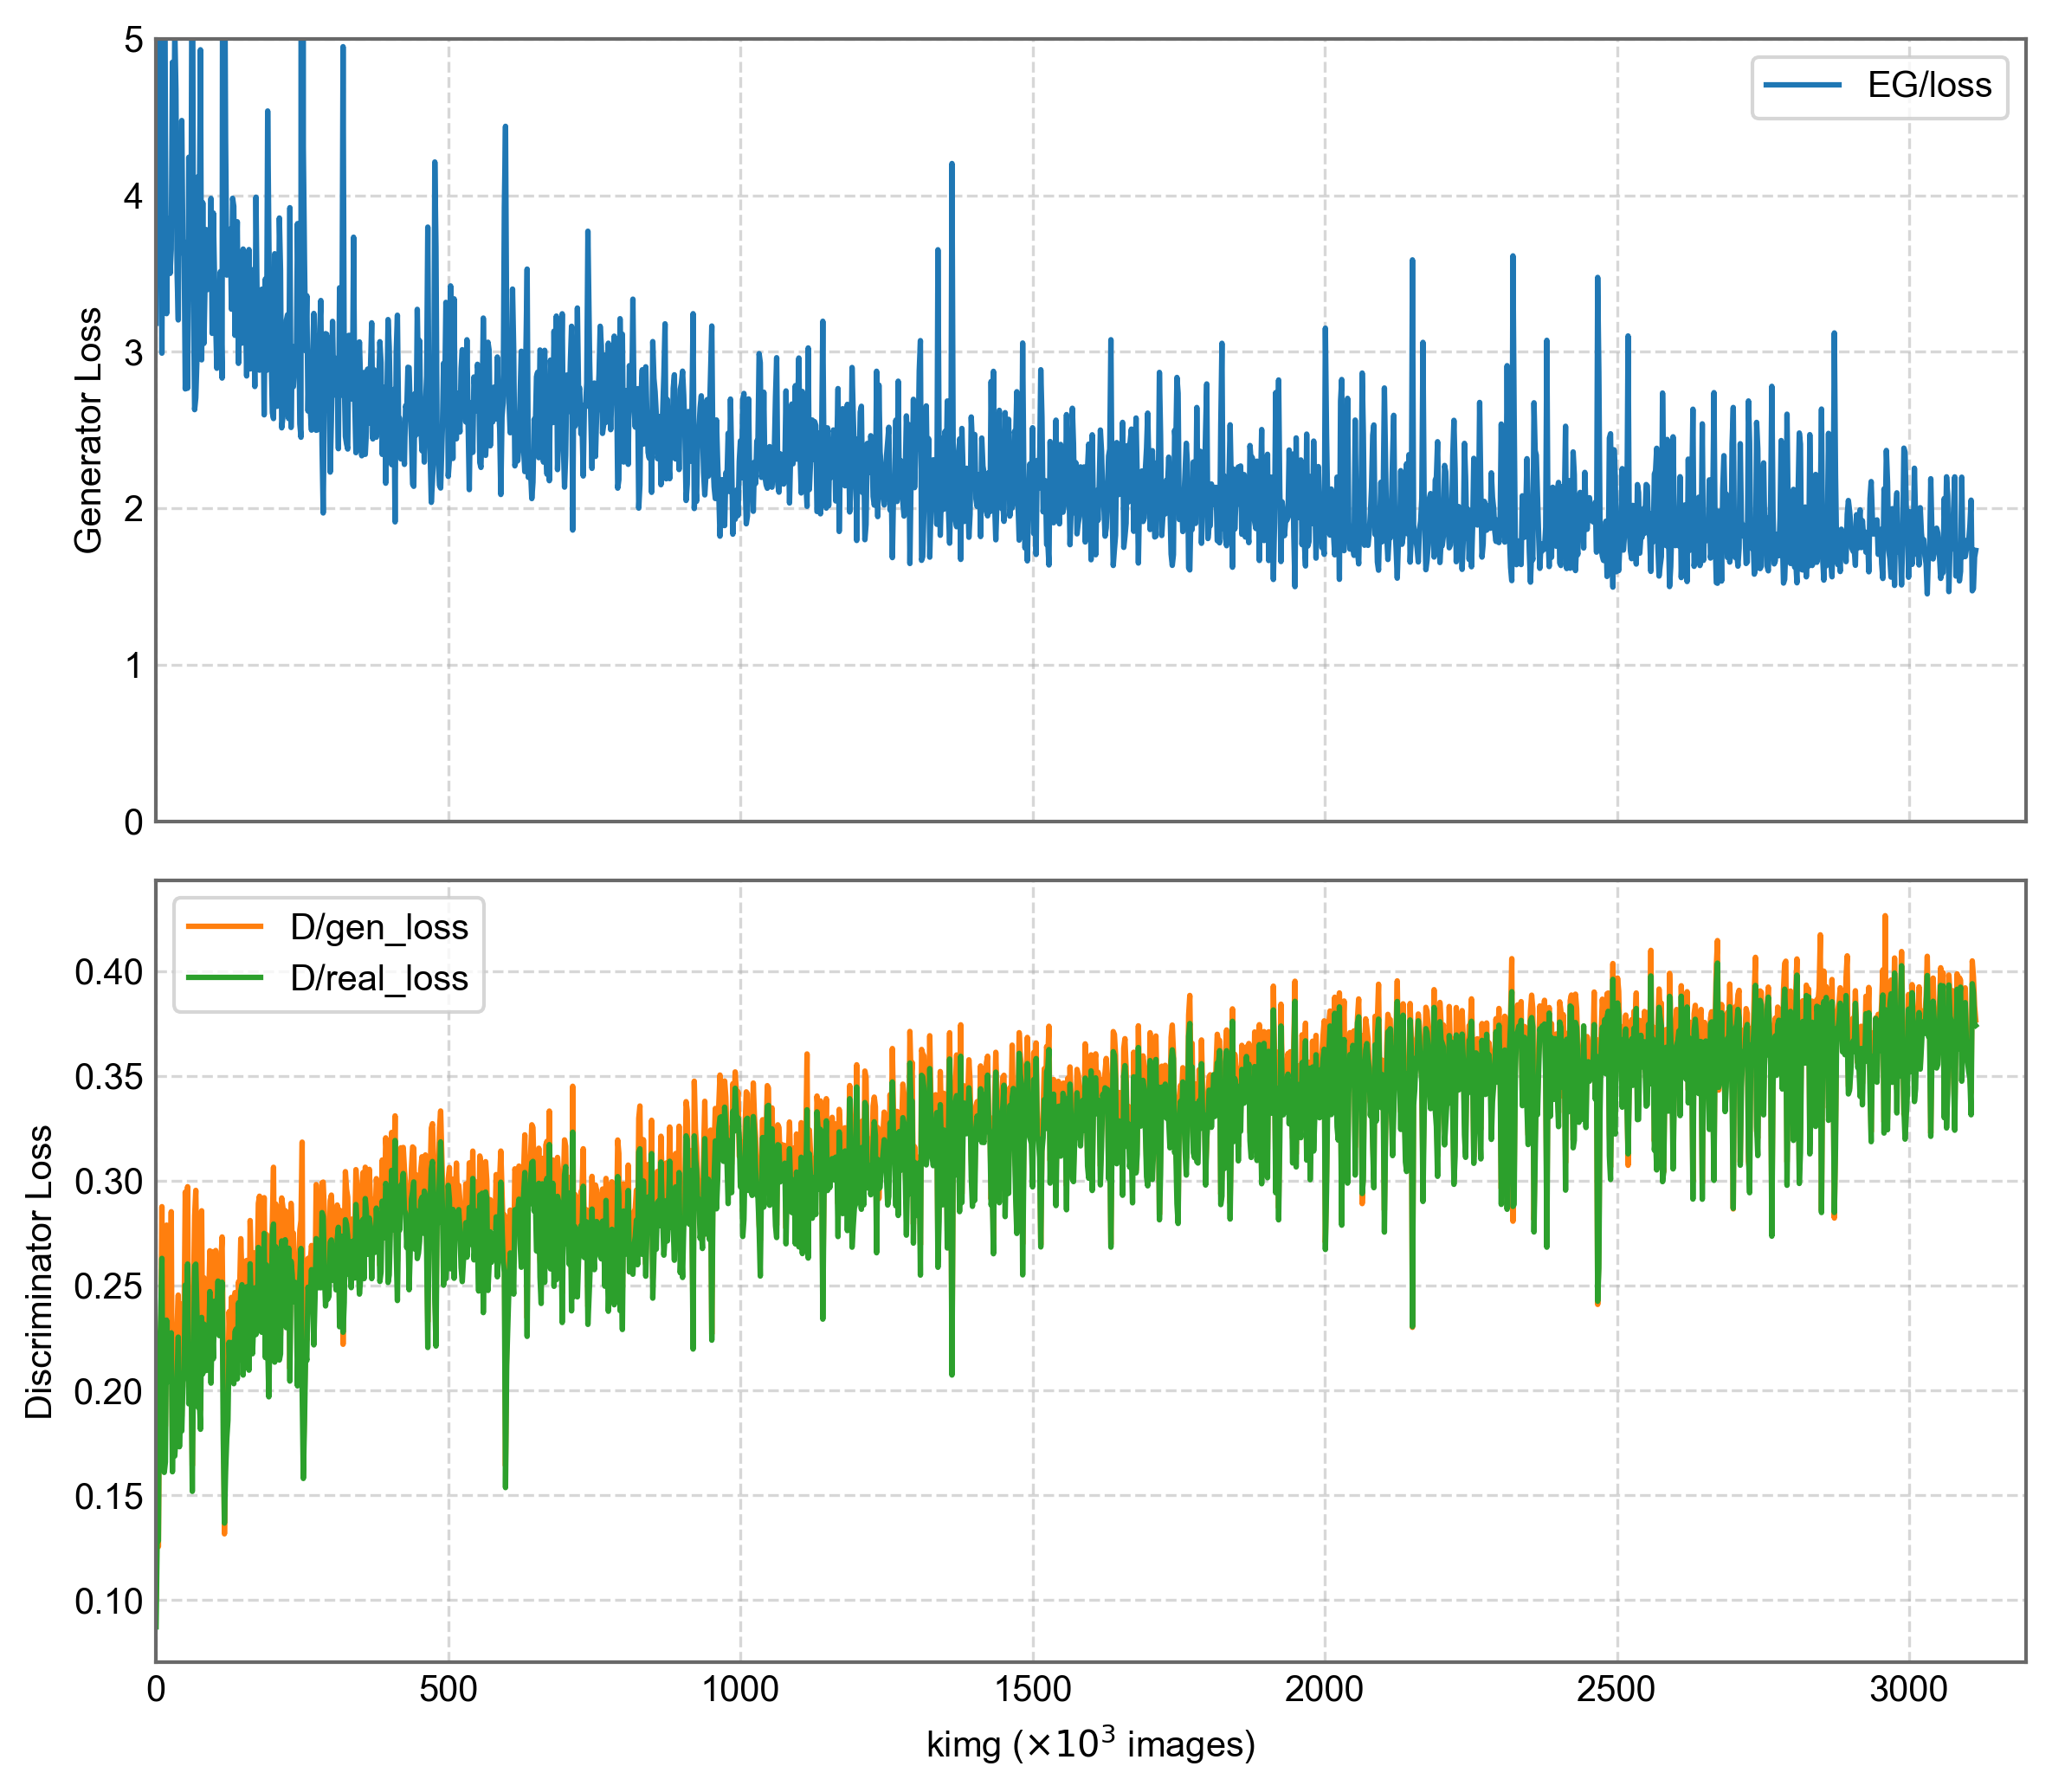

In [6]:
import matplotlib.pyplot as plt
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np  # Added numpy import for potential future use

import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['text.usetex'] = False


def style_ax(ax):
    """
    Unified styling for the plot axes.
    - Sets a transparent background.
    - Sets spine (border) color to gray.
    - Adds a dashed grid behind plot elements.
    - Removes tick marks.
    """
    # Gray frame for the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('dimgray')
    # Grid lines appear behind the plot lines
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    # Remove tick marks for a cleaner look
    ax.tick_params(axis='both', which='both', length=0)


def load_tensorboard_data(logfiles, tags):
    """
    Loads scalar data from one or more TensorBoard event files.

    Args:
        logfiles (list): A list of paths to the .tfevents files.
        tags (list): A list of the scalar tags to extract (e.g., 'Loss/G_loss').

    Returns:
        dict: A dictionary where keys are tags and values are tuples of (steps, values).
    """
    tag_data = {tag: ([], []) for tag in tags}
    last_step = 0
    print("Reading log files...")
    for log in logfiles:
        try:
            ea = EventAccumulator(log, size_guidance={'scalars': 0})
            ea.Reload()

            available_tags = set(ea.Tags().get('scalars', []))

            # Find the last step in the current file to correctly offset the next one
            file_last_step = 0
            for tag in tags:
                if tag in available_tags:
                    for s in ea.Scalars(tag):
                        file_last_step = max(file_last_step, s.step)

            # Append data, offsetting by the cumulative step count
            for tag in tags:
                if tag in available_tags:
                    steps, values = tag_data[tag]
                    for s in ea.Scalars(tag):
                        # Avoid duplicating the step=0 point from a continued run
                        if not (s.step == 0 and last_step != 0):
                            steps.append(last_step + s.step)
                            values.append(s.value)

            last_step += file_last_step
            print(f"  - Finished processing: {os.path.basename(log)}")
        except Exception as e:
            print(f"Could not read file {log}: {e}")
    print("Finished loading data.")
    return tag_data


# --- Main Execution ---
if __name__ == "__main__":
    # Define file paths and output directory
    logdirs = [
        f"{WORKING_DIR}/models/events.out.tfevents.1715709358.bc13u30n1.64581.0",
        f"{WORKING_DIR}/models/events.out.tfevents.1715986489.bc13u30n1.37218.0"
    ]
    OUT_DIR = f"{WORKING_DIR}/images/figure2"

    # Ensure the output directory exists
    os.makedirs(OUT_DIR, exist_ok=True)

    # Define the curves to plot for each subplot
    tags_g = {"training_Loss/G/loss": "EG/loss"}
    tags_d = {
        "training_Loss/D/gen_loss": "D/gen_loss",
        "training_Loss/D/real_loss": "D/real_loss"
    }
    # Combine all tags to load data in one go
    all_tags_to_load = list(tags_g.keys()) + list(tags_d.keys())

    # Load all the necessary data
    all_data = load_tensorboard_data(logdirs, all_tags_to_load)

    # Set plot style and parameters
    plt.style.use('default')
    plt.rcParams.update({
        'font.size': 10,
        'font.family': 'Arial',
        'axes.labelsize': 10,
        'axes.titlesize': 12,
        'lines.linewidth': 1.5,
        'legend.fontsize': 10,
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'axes.linewidth': 1.0
    })

    # --- Create the Plot ---
    # Create a figure with two subplots, sharing the X-axis
    fig, (ax_g, ax_d) = plt.subplots(
        nrows=2, ncols=1, figsize=(8, 7), sharex=True
    )

    # --- Plot Generator Loss (Top Plot) ---
    for tag, label in tags_g.items():
        steps, values = all_data.get(tag, ([], []))
        if steps and values:
            ax_g.plot(steps, values, label=label, color='C0')
        else:
            print(f"Warning: No data found for tag '{tag}'")

    ax_g.set_ylabel("Generator Loss")
    ax_g.legend()
    style_ax(ax_g)
    ax_g.set_ylim([0, 5])  # Set y-limit for the top plot

    # --- Plot Discriminator Loss (Bottom Plot) ---
    for i, (tag, label) in enumerate(tags_d.items()):
        steps, values = all_data.get(tag, ([], []))
        if steps and values:
            # Using C1 and C2 for colors
            ax_d.plot(steps, values, label=label, color=f'C{i + 1}')
        else:
            print(f"Warning: No data found for tag '{tag}'")

    ax_d.set_ylabel("Discriminator Loss")
    ax_d.legend()
    style_ax(ax_d)
    # ax_d.set_ylim([0, 5]) # Set y-limit for the bottom plot

    # --- Configure Shared X-axis ---
    ax_d.set_xlim([0, 3200])
    ax_d.set_xlabel(r"kimg ($\times 10^3$ images)")

    # Adjust layout to prevent labels from overlapping
    plt.tight_layout()

    # Save the figure
    output_path = os.path.join(OUT_DIR, "training_loss_curve_split.pdf")
    plt.savefig(output_path, format="pdf", dpi=300, transparent=True)

    print(f"\nPlot saved successfully to: {output_path}")

    # Optionally, display the plot
    plt.show()
